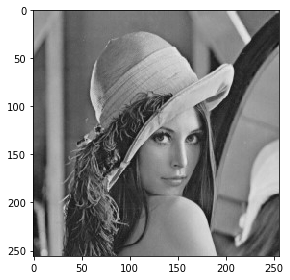

In [6]:
from skimage import io
from skimage.color import rgb2gray
from skimage import io
from numpy.fft import *
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
import time
from skimage.util.dtype import dtype_range
img = io.imread('Lenna.jpg')
io.imshow(img)
img = rgb2gray(img)
io.imshow(img)
img*=255


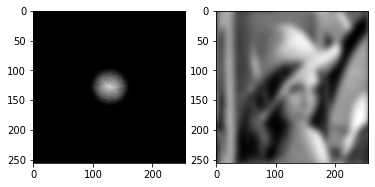

Time: 0.46965575218200684


In [7]:
'''
高斯 FFT濾波
'''
#計時用
start = time.time()
#先做傅立葉轉換 且置中
cf = fftshift(fft2(img))
#創造矩陣 中間是(0,0) 大小是256*256
ar = np.arange(-128,128)
x,y = np.meshgrid(ar,ar)
#高斯濾波內容
sigma=10.0
gl = np.exp(-(x**2+y**2)/sigma**2)
cfgl = cf*gl
cfglfft = exposure.rescale_intensity(np.log(1+abs(cfgl)), out_range=(0.0, 1.0))
#秀出圖片
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(cfglfft,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(np.abs(ifft2(cfgl)), cmap='gray')
plt.show()
#秀出時間
end = time.time()
print("Time:",end - start)

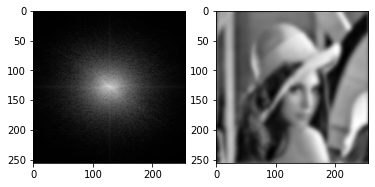

Time: 0.30907249450683594


In [8]:
'''
Butterworth FFT濾波
'''
#計時用
start = time.time()
#先做傅立葉轉換 且置中
cf = fftshift(fft2(img))
#創造矩陣 中間是(0,0) 大小是256*256
ar = np.arange(-128,128)
x,y = np.meshgrid(ar,ar)

#範圍設成15
D=15.0
#butterworth運算
bl = 1.0/(1.0+((x**2+y**2)/D**2)**2)
cfbl = cf*bl
cfblfft = exposure.rescale_intensity(np.log(1+abs(cfbl)), out_range=(0.0, 1.0))
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(cfblfft,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(np.abs(ifft2(cfbl)), cmap='gray')
plt.show()
end = time.time()
print("Time:",end - start)